In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Aufgabe 5: Gauß-Seidel- und Jacobi-Verfahren


Implementieren Sie das Gauss-Seidel- und das Jacobi-Verfahren zur Lösung eines linearen Gleichungssystems $Ax = b$, das die Voraussetzungen des jeweiligen Verfahrens erfüllt.
    Schreiben Sie dazu die Funktionen `gaussseidel` und `jacobi` mit den Parametern `A, b, kmax` und `tol`, wie unten erklärt.
    Verwenden Sie als Startvektor den Nullvektor.
    Die  Funktionen sollen jeweils höchstens `kmax` mal iterieren, aber früher enden, wenn sowohl

1. das Residuum $r^{(k)} = A x^{(k)} - b$ als auch
2. der Iterierten-Abstand $x^{(k)} - x^{(k-1)}$

in der Maximumsnorm kleiner ist als die vorgegebene Schranke `tol`.
    Dabei soll `gaussseidel` das Gauss-Seidel-Verfahren und `jacobi` das Jacobi-Verfahren benutzen. 
    Beide Funktionen geben die letzte Iterierte (als `numpy`-Array) und die Anzahl der benötigten Schritte aus.

> **Hinweis:** Die Maximumsnorm kann mit `np.linalg.norm(..., ord=np.inf)` berechnet werden.

In [17]:
def gaussseidel(A, b, kmax=1000, tol=1.0e-6):
    """
    Loese das lineare Gleichungssystem  A*x=b  mit dem Gauss-Seidel-Verfahren
    Input-Parameter:
    A, b: Parameter des linearen Gleichungssystems;
    kmax: maximale Iterationszahl: Abbruch bei  k >= kmax ;
    tol: Toleranz fuer die Abbruchkriterien: Abbruch bei (Maximumsnorm)
         (1) Residuum ist klein:  || A*x_k - b || < tol    und
         (2) Iterierte bewegen sich kaum:  ||x_k-x_{k-1}|| < tol .
    Output-Parameter:
    x: Naeherungsloesung des linearen Gleichungssystems  A*x=b;
    k: Anzahl der benoetigten Iterationen
    """
    x = np.zeros_like(b)
    n = b.shape[0]
    k = 0
    #
    #  Hier fuegen Sie Ihren Code ein:
    #
    while (k < kmax) and (np.linalg.norm(A @ x - b, ord=np.inf) >= tol or np.linalg.norm(x - xp, ord=np.inf) >= tol):
        k += 1
        xp = x.copy()  #  X Previous
        for r in range(n):
            x[r] = (
                b[r] - np.inner(A[r, :r], x[:r]) - np.inner(A[r, r + 1 :], x[r + 1 :])
            ) / A[r, r]
    return (x, k)


def jacobi(A, b, kmax=1000, tol=1.0e-6):
    """
    Loese das lineare Gleichungssystem  A*x=b  mit dem Jacobi_verfahren
    Input-Parameter:
    A, b: Parameter des linearen Gleichungssystems;
    kmax: maximale Iterationszahl: Abbruch bei  k >= kmax ;
    tol: Toleranz fuer die Abbruchkriterien: Abbruch bei (Maximumsnorm)
         (1) Residuum ist klein:  || A*x_k - b || < tol    und
         (2) Iterierte bewegen sich kaum:  ||x_k-x_{k-1}|| < tol .
    Output-Parameter:
    x: Naeherungsloesung des linearen Gleichungssystems  A*x=b;
    k: Anzahl der benoetigten Iterationen;
    """
    x = np.zeros_like(b)
    n = b.shape[0]
    k = 0
    #
    #  Hier fuegen Sie Ihren Code ein:
    #
    while (k < kmax) and (np.linalg.norm(A @ x - b, ord=np.inf) >= tol or np.linalg.norm(x - xp, ord=np.inf) >= tol):
        k += 1
        xp = x.copy()
        for r in range(n):
            x[r] = (
                b[r] - np.inner(A[r, :r], xp[:r]) - np.inner(A[r, r + 1 :], xp[r + 1 :])
            ) / A[r, r]
    return (x, k)

## Testskript


Das Testskript ruft Ihre Funktionen mit Gleichungsystem der Dimension $n = 25,50,100,200$ und Toleranz $\mathtt{tol} = 10^{-4}$ auf und vergleicht die Ergebnisse.
Das ganze kann etwas dauern. Zum Testen können Sie deshalb kleinere Parameter wählen.

In [22]:
Ns = [25, 50, 100, 200]  # Werte für n
# Ns = [10, 15, 25, 50]

numpy.linalg.solve:            time =   0.00127"  res = 2.27374e-13
Gauss:  iterations =   787     time =   0.029"    res = 9.96758e-05
Jacobi: iterations =  1572     time =   0.057"    res = 9.96169e-05
numpy.linalg.solve:            time =   0.00031"  res = 1.08713e-12
Gauss:  iterations =  3030     time =   0.208"    res = 9.99484e-05
Jacobi: iterations =  6058     time =   0.411"    res = 9.98382e-05
numpy.linalg.solve:            time =   0.00040"  res = 5.18519e-12
Gauss:  iterations = 11886     time =   1.772"    res = 9.99209e-05
Jacobi: iterations = 23768     time =   3.749"    res = 9.99895e-05
numpy.linalg.solve:            time =   0.00029"  res = 1.41505e-11
Gauss:  iterations = 47074     time =  15.279"    res = 9.99858e-05
Jacobi: iterations = 94145     time =  30.616"    res = 9.99909e-05


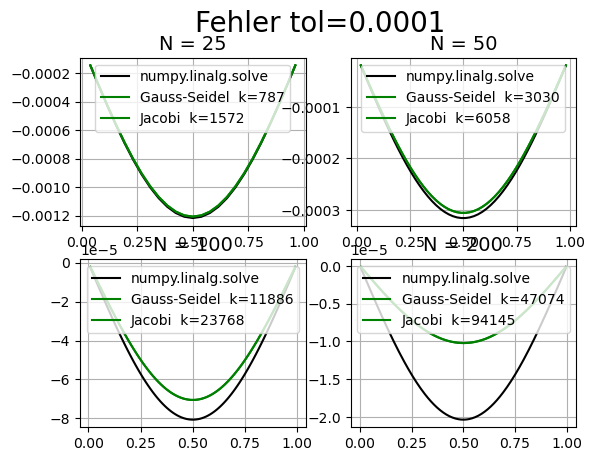



Gauss-Seidel-Verfahren
Iterationen
[  787  3030 11886 47074]
Laufzeiten ["]
[ 0.029  0.208  1.772 15.279]
Residuen
[0.000100 0.000100 0.000100 0.000100]

Jacobi-Verfahren
Iterationen
[ 1572  6058 23768 94145]
Laufzeiten ["]
[ 0.057  0.411  3.749 30.616]
Residuen
[0.000100 0.000100 0.000100 0.000100]


In [25]:
def laplace(N):
    """
    Erstelle eine (negative) Laplace-Matrix der Groesse (N,N).
    Resultat ist ein 2-D-numpy-Array.
    """
    f = (N + 1.0) * (N + 1.0)  #  == 1 / h**2
    D = np.full(N, 2.0 * f)
    E = np.full(N - 1, f)
    A = np.diag(D) - np.diag(E, k=1) - np.diag(E, k=-1)
    return A


def buildB(N):
    """
    Erzeuge die rechte Seite des LGS aus Aufgabe P-05  als numpy-Array.
    """
    x = np.linspace(0.0, np.pi, N + 2)
    y = (np.pi * np.pi) * np.sin(x)[1:-1]
    return y


num = len(Ns)
gauss_iter = np.zeros(num, dtype=int)  #  Anzahl Iterationen
jacobi_iter = np.zeros(num, dtype=int)
gauss_time = np.zeros(num)  #  Laufzeit
jacobi_time = np.zeros(num)
gauss_res = np.zeros(num)  #  Residuum (max-Norm)
jacobi_res = np.zeros(num)
kmax = 50000000

fig = plt.figure("Fehler tol=%g" % (tol))
plt.suptitle("Fehler tol=%g" % (tol), fontsize=20)
px = 0
for (i, N) in enumerate(Ns):
    
    #  Grafik-Initialisierung
    plt.subplot(2, 2, i+1)
    plt.title("N = %d" % (N), fontsize=14)
    
    #  Initialisierung des linearen Gleichungssystems
    A = laplace(N)  #  A und b behandeln NUR die inneren Punkte!
    b = buildB(N)
    x = np.linspace(0.0, 1.0, N + 2)[1:-1]
    
    #  Exakte Lösung
    reference = np.sin(np.pi * x)
    
    #  1.Verfahren:  numpy-Loeser
    start = time.perf_counter()
    numpy_solution = np.linalg.solve(A, b)
    numpy_time = time.perf_counter() - start
    res = norm(A @ numpy_solution - b, np.inf)
    print(
        'numpy.linalg.solve:            time = %9.5f"  res = %g' % (numpy_time, res))
    plt.plot(x, reference - numpy_solution, "k-", label="numpy.linalg.solve")
    
    #  2.Verfahren:  Gauss-Seidel
    start = time.perf_counter()
    gauss_solution, gauss_iter[i] = gaussseidel(A, b, kmax=kx, tol=tol)
    gauss_time[i] = time.perf_counter() - start
    gauss_res[i] = norm(A @ gauss_solution - b, np.inf)
    print(
        'Gauss:  iterations = %5d     time = %7.3f"    res = %g'
        % (gauss_iter[i], gauss_time[i], gauss_res[i])
    )
    plt.plot(x, reference - gauss_solution, "g-", label="Gauss-Seidel  k=%d" % gauss_iter[i])
    
    #  3.Verfahren:  Jacobi
    start = time.perf_counter()
    jacobi_solution, jacobi_iter[i] = jacobi(A, b, kmax=kx, tol=tol)
    jacobi_time[i] = time.perf_counter() - start
    jacobi_res[i] = norm(A @ jacobi_solution - b, np.inf)
    print(
        'Jacobi: iterations = %5d     time = %7.3f"    res = %g'
        % (jacobi_iter[i], jacobi_time[i], jacobi_res[i])
    )
    plt.plot(x, reference - jacobi_solution, "g-", label="Jacobi  k=%d" % jacobi_iter[i])
    
    plt.grid(True)
    plt.legend(loc=9)
    
plt.show()
#
print("\n\nGauss-Seidel-Verfahren")
print("Iterationen")
print(gauss_iter)
np.set_printoptions(precision=3, floatmode="fixed", suppress=True)
print('Laufzeiten ["]')
print(gauss_time)
np.set_printoptions(precision=6, floatmode="fixed", suppress=True)
print("Residuen")
print(gauss_res)
#
print("\nJacobi-Verfahren")
print("Iterationen")
print(jacobi_iter)
np.set_printoptions(precision=3, floatmode="fixed", suppress=True)
print('Laufzeiten ["]')
print(jacobi_time)
np.set_printoptions(precision=6, floatmode="fixed", suppress=True)
print("Residuen")
print(jacobi_res)